<a href="https://colab.research.google.com/github/agrawalkunal2/insurance-cross_sell/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [63]:
# loading necessary libraries
import pandas as pd
from sklearn.metrics import accuracy_score, auc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Supressing warnings
import warnings  
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone 3/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")


Let's take look and feel of our data

In [15]:
data.head() # first five rows of data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
data.tail() # last 5 rows

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [ ]:
data.shape # seeing the shape of data

(381109, 12)

In [ ]:
# checking the data types of columns present and number of entries
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


**Five Number Summary**

In [ ]:
data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,381109,NaN,NaN,NaN,190555,110017,1,95278,190555,285832,381109
Gender,381109,2,Male,206089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,381109,NaN,NaN,NaN,38.8226,15.5116,20,25,36,49,85
Driving_License,381109,NaN,NaN,NaN,0.997869,0.0461095,0,1,1,1,1
Region_Code,381109,NaN,NaN,NaN,26.3888,13.2299,0,15,28,35,52
Previously_Insured,381109,NaN,NaN,NaN,0.45821,0.498251,0,0,0,1,1
Vehicle_Age,381109,3,1-2 Year,200316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Damage,381109,2,Yes,192413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Premium,381109,NaN,NaN,NaN,30564.4,17213.2,2630,24405,31669,39400,540165
Policy_Sales_Channel,381109,NaN,NaN,NaN,112.034,54.204,1,29,133,152,163


So here, we can see "Response" is our dependent variable.<BR>
Checking the sanity of data, we can observe that the data is sane, for age our min value is 20. years and max value is 85. Also, the data available to us are of policy holders that have been with company for atleast 10 days.

In [16]:
# finding out the unique counts of variables
data.apply(lambda x: len(x.unique()))

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [28]:
# Checking if there is any customer who doesn't have Driving license but still is interested in Motor Insurance
data[(data['Driving_License'] == 0) & (data['Response'] == 1 )].shape

(41, 12)

So, from the above command, we can see that there are 41 entries wherein the customer doesn't possess Driving License, however, he/she is interested in Motor Insurance. So we can either remove these entries or we can ignore them by considering that these people own vehicle, however, someone else is driving it.

In [29]:
# dropping id as it is of no use in our models
data.drop("id",axis=1,inplace=True)

In [30]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### EDA
Following steps will be taken for our EDA processing


*   Null Value Treatment
* Removing Duplicate Values
*   Univariate Analysis



Let's first check if there is any null values present in our data

In [31]:
# checking null values
data.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

So, the good thing about the data provided to us is that there is no null values present and thus no treatment is required

In [44]:
# duplicate values check
len(data[data.duplicated()])

269

As we can observe, there are 269 duplicate entries and we need to remove these entries so that our models can predict better results

In [46]:
# keeping first row and deleting other rows
data.drop_duplicates(keep="first",inplace=True)

In [47]:
data.shape

(380840, 11)

In [35]:
# find Quartile ranges
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR) 
upper_range= Q3+(1.5 * IQR)
print(IQR,"\n",lower_range, "\n",upper_range)

Age                        24.0
Driving_License             0.0
Region_Code                20.0
Previously_Insured          1.0
Annual_Premium          14995.0
Policy_Sales_Channel      123.0
Vintage                   145.0
Response                    0.0
dtype: float64 
 Age                      -11.0
Driving_License            1.0
Region_Code              -15.0
Previously_Insured        -1.5
Annual_Premium          1912.5
Policy_Sales_Channel    -155.5
Vintage                 -135.5
Response                   0.0
dtype: float64 
 Age                        85.0
Driving_License             1.0
Region_Code                65.0
Previously_Insured          2.5
Annual_Premium          61892.5
Policy_Sales_Channel      336.5
Vintage                   444.5
Response                    0.0
dtype: float64


As we know that our dependent variable is "Response". Let us try to find its count

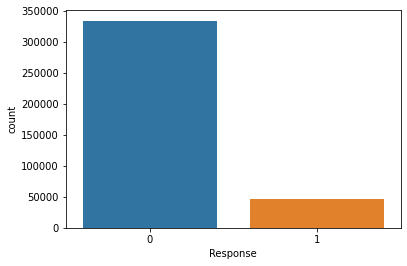

In [49]:
#count of 
sns.countplot(data["Response"])

As we can see there is high imbalnce in the responses data and we need to treat this data dor processing, else it won't provide us with accurate results.

Let's try to do some univariate analysis

By looking into the data we can state that following columns are categorical
* Gender
* Driving_License
* Previously_Insured
* Vehicle_Age
* Vehicle_Damage

In [50]:
data1 = data.copy()

In [61]:
def with_hue(data,feature,ax):
    
    #Numnber of categories
    num_of_cat=len([x for x in data[feature].unique() if x==x])
    
    bars=ax.patches
    
    for ind in range(num_of_cat):
        ##     Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::num_of_cat] 
        # Get the total height (for percentages)
        total=sum([x.get_height() for x in hueBars])
        #Printing percentages on bar
        for bar in hueBars:
            percentage='{:.1f}%'.format(100 * bar.get_height()/total)
            ax.text(bar.get_x()+bar.get_width()/2.0,
                   bar.get_height(),
                   percentage,
                    ha="center",va="bottom",fontweight='bold')
    

    
def without_hue(data,feature,ax):
    
    total=float(len(data))
    bars_plot=ax.patches
    
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y,(percentage,bars.get_height()),ha='center',fontweight='bold')


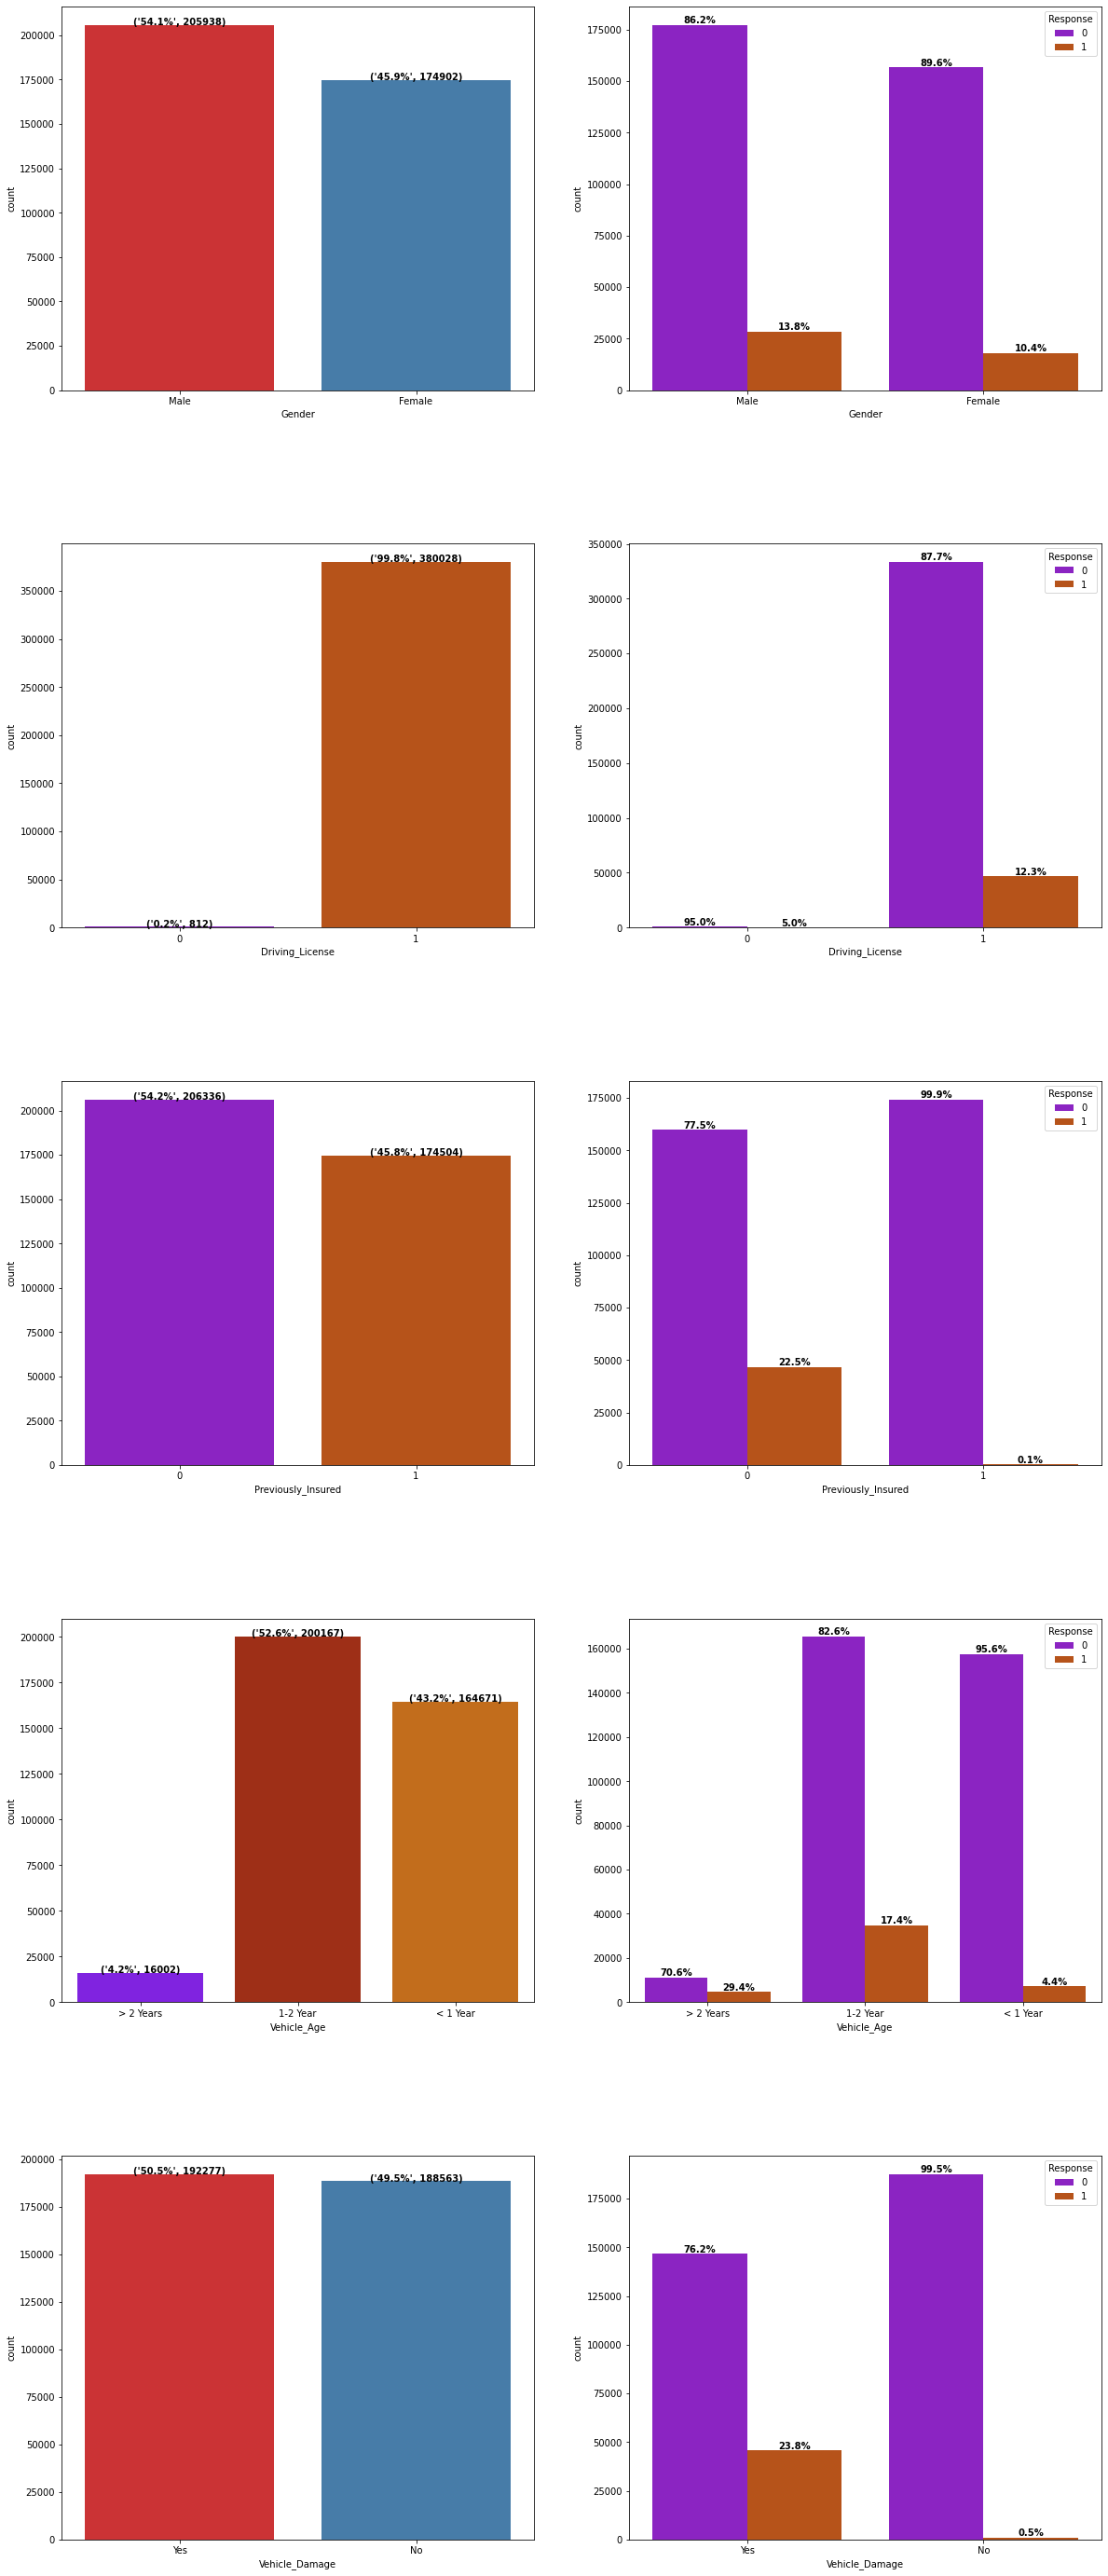

In [69]:
f,ax=plt.subplots(nrows=5,ncols=2,figsize=(20,50), 
                  gridspec_kw={'width_ratios': [10,10],
                               'height_ratios': [10,10,10,10,10],'wspace': 0.2,
                       'hspace': 0.4})


a1=sns.countplot(data=data,x="Gender",ax=ax[0][0],palette="Set1")
without_hue(data,'Gender',a1)
a2=sns.countplot(data=data,x='Gender',hue='Response',palette="gnuplot",ax=ax[0][1])
with_hue(data,'Gender',a2)

b1=sns.countplot(data=data,x="Driving_License",palette="gnuplot",ax=ax[1][0])
without_hue(data,"Driving_License",b1)
b2=sns.countplot(data=data,x="Driving_License",hue='Response',palette="gnuplot",ax=ax[1][1])
with_hue(data,"Driving_License",b2)

c1=sns.countplot(data=data,x="Previously_Insured",palette="gnuplot",ax=ax[2][0])
without_hue(data,"Previously_Insured",c1)
c2=sns.countplot(data=data,x="Previously_Insured",hue='Response',palette="gnuplot",ax=ax[2][1])
with_hue(data,"Previously_Insured",c2)

d1=sns.countplot(data=data,x="Vehicle_Age",palette="gnuplot",ax=ax[3][0])
without_hue(data,"Vehicle_Age",d1)
d2=sns.countplot(data=data,x="Vehicle_Age",hue='Response',palette="gnuplot",ax=ax[3][1])
with_hue(data,"Vehicle_Age",d2)

e1=sns.countplot(data=data,x="Vehicle_Damage",ax=ax[4][0],palette="Set1")
without_hue(data,"Vehicle_Damage",e1)
e2=sns.countplot(data=data,x="Vehicle_Damage",hue='Response',palette="gnuplot",ax=ax[4][1])
with_hue(data,"Vehicle_Damage",e2)